<a href="https://colab.research.google.com/github/amartsin/Wine_dataset-analysis/blob/main/White_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('winequality-white.csv',sep =';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
len(df.index)

4898

In [6]:
#The number of rows is 4898

In [7]:
len(df.columns) #Total number of features

12

In [8]:
class_label =df["quality"]

In [9]:
class_label

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [10]:
import sklearn
from sklearn.utils import shuffle

In [11]:
white_wine = sklearn.utils.shuffle( df,random_state=1)

In [12]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2414,6.2,0.38,0.18,7.4,0.095,28.0,195.0,0.99773,3.53,0.71,9.2,4
1584,6.4,0.25,0.74,7.8,0.045,52.0,209.0,0.99560,3.21,0.42,9.2,6
3248,6.4,0.25,0.37,4.5,0.039,41.0,147.0,0.99210,3.18,0.40,11.1,7
645,6.3,0.26,0.25,7.8,0.058,44.0,166.0,0.99610,3.24,0.41,9.0,5
3163,7.1,0.36,0.37,4.8,0.019,39.0,114.0,0.99036,3.08,0.49,12.7,7


In [13]:
import seaborn as sns

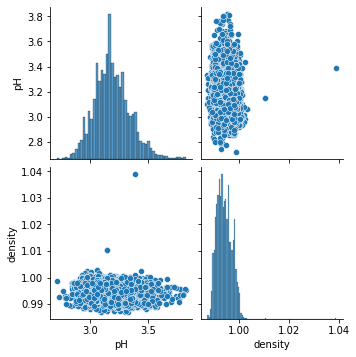

In [14]:
data= white_wine[["pH", "density"]]
sns.pairplot(data)

**WE NEED TO FIRST SCALE THE DATA IN ORDER TO PERFORM PCA**

In [15]:

import sklearn
from sklearn.preprocessing import StandardScaler


In [17]:
scaler = StandardScaler()
scaler.fit(white_wine)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled_data = scaler.transform(white_wine)

In [19]:
scaled_data

array([[-0.77601514,  1.00967039, -1.27423152, ...,  1.92923542,
        -1.06808001, -2.12061798],
       [-0.53898711, -0.28021359,  3.35358273, ..., -0.61207884,
        -1.06808001,  0.13787014],
       [-0.53898711, -0.28021359,  0.29591974, ..., -0.78734189,
         0.47601411,  1.2671142 ],
       ...,
       [ 1.83129314, -0.87554465,  0.70911744, ...,  1.40344626,
         0.47601411, -2.12061798],
       [-0.89452915, -0.57787912, -0.69575474, ..., -0.78734189,
         0.15094166, -0.99137392],
       [ 0.40912499, -0.47865728,  0.37855928, ..., -0.43681578,
        -1.23061624,  0.13787014]])

In [20]:
from sklearn.decomposition import PCA



In [21]:
pca = PCA(n_components=2)


In [22]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
x_pca= pca.transform(scaled_data)


In [25]:
x_pca.shape #Performed PCA

(4898, 2)

In [27]:
x_pca

array([[ 2.0525258 ,  2.41965321],
       [ 2.04418075,  0.11747638],
       [-0.94060592,  0.32805739],
       ...,
       [-0.35534272, -2.48195622],
       [ 0.61830603,  0.87581636],
       [ 2.91988356,  0.05178253]])

Text(0, 0.5, 'Second Principle Component')

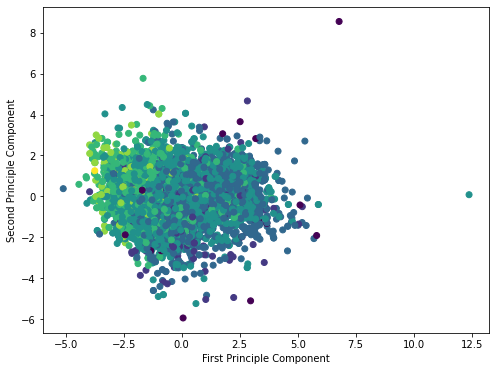

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c =white_wine['quality'] )
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')


**AS WE CAN SEE WE HAVE LOST MANY INFORMATION FROM THE DATA**

In [38]:
l = np.array(x_pca[:,0])
m = np.array(x_pca[:,1])
print("Variance of first PC is: {}",l.var())
print("Variance of second PC is: {}",m.var())


Variance of first PC is: {} 3.346668864931432
Variance of second PC is: {} 1.5860902952794733


In [39]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2414,6.2,0.38,0.18,7.4,0.095,28.0,195.0,0.99773,3.53,0.71,9.2,4
1584,6.4,0.25,0.74,7.8,0.045,52.0,209.0,0.99560,3.21,0.42,9.2,6
3248,6.4,0.25,0.37,4.5,0.039,41.0,147.0,0.99210,3.18,0.40,11.1,7
645,6.3,0.26,0.25,7.8,0.058,44.0,166.0,0.99610,3.24,0.41,9.0,5
3163,7.1,0.36,0.37,4.8,0.019,39.0,114.0,0.99036,3.08,0.49,12.7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2895,6.4,0.44,0.26,2.0,0.054,20.0,180.0,0.99520,3.58,0.57,10.0,5
2763,7.7,0.30,0.34,1.2,0.048,4.0,119.0,0.99084,3.18,0.34,12.1,6
905,8.4,0.19,0.42,1.6,0.047,9.0,101.0,0.99400,3.06,0.65,11.1,4
3980,6.1,0.22,0.25,12.1,0.035,54.0,135.0,0.99481,3.21,0.40,10.7,5


**TRAIN TEST SPLITTING**

In [43]:
val_data= white_wine[:1000]

In [44]:
test_data = white_wine[3898:]

In [45]:
train_data = white_wine[1000:3898]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2414,6.2,0.38,0.18,7.4,0.095,28.0,195.0,0.99773,3.53,0.71,9.2,4
1584,6.4,0.25,0.74,7.8,0.045,52.0,209.0,0.99560,3.21,0.42,9.2,6
3248,6.4,0.25,0.37,4.5,0.039,41.0,147.0,0.99210,3.18,0.40,11.1,7
645,6.3,0.26,0.25,7.8,0.058,44.0,166.0,0.99610,3.24,0.41,9.0,5
3163,7.1,0.36,0.37,4.8,0.019,39.0,114.0,0.99036,3.08,0.49,12.7,7
